<a href="https://colab.research.google.com/github/Ghiles1010/Recommendation-system/blob/master/FC-RN/FC-RN-TAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########################
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/PFE STUFF/Yelp_DB")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
add_categories.ipynb			 nosent_violin.png
best_regression_model_sent.h5		 Ontology_filled.owl
best_sent_rn.h5				 Ontology.owl
Business_Yelp.json			 pmf.txt
doc2vec150.model			 regression_model2.h5
doc2vec150.model.trainables.syn1neg.npy  regression_model_sentiments.h5
doc2vec150.model.wv.vectors.npy		 results_sem.txt
doc2vec.model				 Review_Yelp.json
doc2vec.model.trainables.syn1neg.npy	 sent_analysis.h5
doc2vec.model.wv.vectors.npy		 sent.txt
FC_RN_AS.h5			

In [ ]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('punkt')
en_stops = set(stopwords.words('english'))

rev = open("Review_Yelp.json")

bus = {}
cpt = 0

for i in rev.readlines()[:1000000]:
  
  line = json.loads(i)

  id = line["business_id"]
  text = line["text"]

  if bus.get(id) == None:
    bus[id] = {}
    bus[id]["comments"] = []
    bus[id]["nb_words"] = 0

  if len(bus[id]["comments"]) <= 1500: # number of total words

    text = text.lower()
    text = word_tokenize(text)

    nb_words = 0
    for word in text: 
      if word not in en_stops:
          bus[id]["comments"].append(word)
          nb_words += 1
      if nb_words == 65:
        break
  
  cpt += 1
  	
  if cpt%100000 == 0:
    print(cpt)
  
rev.close()

KeyboardInterrupt: ignored

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(bus[id]["comments"], [id]) for id in bus]

In [ ]:
import multiprocessing
cpu = multiprocessing.cpu_count()

doc_model = Doc2Vec(tagged_data, vector_size=150, window=5, min_count=1, workers = cpu, epochs = 10)
doc_model.save("doc2vec150.model")

In [ ]:
os.chdir("/content/drive/My Drive/PFE STUFF/Yelp_DB")
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
doc_model= Doc2Vec.load("doc2vec150.model")


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
def normalize(text):
    text = text.lower()
    text = word_tokenize(text)
    return text

test_doc = normalize("has a great service i liked the sushis")
doc_model.docvecs.most_similar(positive=[doc_model.infer_vector(test_doc)],topn=10)
#doc_model["IS4cv902ykd8wj1TR0N3-A"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('lx4vVJndLJjRmZKQNIaXpA', 0.6440919041633606),
 ('F8ZTmT9pGiSF2jx9FZDjdQ', 0.6413952708244324),
 ('0-WocGTpO3Zm4q1Zzz49Rw', 0.6337976455688477),
 ('mSlVEqqpWdKKfp-O0RWNBw', 0.6335627436637878),
 ('sHCEi2FXTGzo1D0SIgZUCA', 0.6326776742935181),
 ('UsYoI0mwqp9wQETA0eiAog', 0.6272621750831604),
 ('6r0r0cJSLvh2BDir8TaxPw', 0.6232832670211792),
 ('RQxLNvAra_MUUPHdhukilA', 0.6227654814720154),
 ('Ejl2X5njahhqUutgfGFwOg', 0.6214480400085449),
 ('Xp46hv8TxejNDGbJJ2cfQw', 0.6200817227363586)]

#Format Data

In [ ]:
#os.chdir("/content/drive/My Drive/PFE STUFF/Yelp_DB_Final/Yelp_10%")
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np


#nltk.download('stopwords')
#nltk.download('punkt')
en_stops = set(stopwords.words('english'))

rev = open("Review_Yelp.json")

idu = {}
idb = {}

cpt = 0
train_vec = []

global_b = 0
global_u = 0

import pandas as pd

for i in rev.readlines()[:1000000]:
  
  line = json.loads(i)

  user_id = line["user_id"]
  prest_id = line["business_id"]

  if idu.get(user_id) == None:
    idu[user_id] = global_u
    global_u += 1

  if idb.get(prest_id) == None:
    idb[prest_id] = global_b
    global_b += 1
  
  line = [ idu[user_id], idb[prest_id], line["stars"], doc_model[prest_id]]
  train_vec.append(np.array(line))




  
  cpt += 1
  	
  if cpt%100000 == 0:
    print(cpt)
  
train_vec = np.array(train_vec)
rev.close()

100000
200000
300000
400000
500000
600000
700000
800000
900000


In [ ]:
import pandas as pd

pd.DataFrame(train_vec).head

<bound method NDFrame.head of            0      1  2                                                  3
0          0      0  4  [0.7324871, -1.0576589, 0.68459404, -0.2323185...
1          1      1  4  [0.7290477, -0.35522324, -0.06824166, -0.22994...
2          2      2  4  [0.88792914, -1.1994787, -0.3558788, -0.046334...
3          3      3  4  [-1.5746425, -0.4514526, -0.008411887, -1.4302...
4          4      4  1  [0.38740888, -0.85932404, -0.07597077, -0.8308...
...      ...    ... ..                                                ...
908613   474  30400  3  [-2.288844, -0.60704935, 0.57414556, 0.4280769...
908614  2150  32402  5  [-0.087114714, -0.07976535, -0.684321, 0.68873...
908615  3350  29440  3  [0.75981915, -2.382456, 0.38090044, 0.6317835,...
908616  2457  30907  2  [-0.8755783, -0.35241312, 0.53428376, -0.82152...
908617  2627  30176  5  [0.36608106, -0.062043726, -0.010301099, -0.50...

[908618 rows x 4 columns]>

In [ ]:
os.chdir("/content/drive/My Drive/PFE STUFF/MovieLens")
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy as np


#nltk.download('stopwords')
#nltk.download('punkt')
en_stops = set(stopwords.words('english'))

rev = open("movielens100k.data.txt")

idu = {}
idb = {}

cpt = 0
train_vec = []

global_b = 0
global_u = 0

import pandas as pd

for i in rev.readlines():
  
  user_id, prest_id, stars, x = i.split("\t")

  if idu.get(user_id) == None:
    idu[user_id] = global_u
    global_u += 1

  if idb.get(prest_id) == None:
    idb[prest_id] = global_b
    global_b += 1
  
  line = [ idu[user_id], idb[prest_id], stars]
  train_vec.append(np.array(line))




  
  cpt += 1
  	
  if cpt%100000 == 0:
    print(cpt)
  
train_vec = np.array(train_vec)
rev.close()

100000


In [ ]:
def invert_dic(dic):
  idic  = {}
  for i in dic:
    idic[dic[i]] = i
  return idic

inv_idu = invert_dic(idu)
inv_idb = invert_dic(idb)

In [ ]:
train_vec = pd.DataFrame(train_vec, columns = ['user_id', 'business_id', 'ratings', 'bus_model'])
train_vec = pd.DataFrame(train_vec, columns = ['user_id', 'business_id', 'ratings'])
#train_vec[['business_id', 'bus_model']]

In [ ]:
from sklearn.model_selection import train_test_split

users = np.array(train_vec.user_id).astype('int32')
business = np.array(train_vec.business_id).astype('int32')
ratings = np.array(train_vec.ratings).astype('int32')


y_train, y_test, user_train, user_test, bus_train, bus_test = train_test_split(ratings, users, business, test_size=0.2, random_state = 42)

In [ ]:
train_vec.head

<bound method NDFrame.head of        user_id business_id ratings
0            0           0       4
1            1           1       4
2            2           2       4
3            3           3       4
4            4           4       1
...        ...         ...     ...
908613     474       30400       3
908614    2150       32402       5
908615    3350       29440       3
908616    2457       30907       2
908617    2627       30176       5

[908618 rows x 3 columns]>

In [ ]:
embeddings = np.zeros((len(idb) + 1, 150))

for i in sorted(idb.values()):
  embeddings[i] = doc_model[inv_idb[i]]

#RS Algorithme

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import tensorflow as tf
import keras

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from keras.models import Model
import numpy as np

warnings.filterwarnings('ignore')


# creating book embedding path
item_input = Input(shape=[1], name="Item-Input")
#item_embedding = Embedding(len(idb) + 1, 150, name="Item-Embedding", weights = [embeddings], trainable = False)(item_input)
item_embedding = Embedding(len(idb) + 1, 150, name="Item-Embedding")(item_input)
item_vec = Flatten(name="Flatten-Items")(item_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(len(idu) + 1, 150, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([item_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001))(conc)
fc2 = Dense(32, activation='relu',  kernel_regularizer = keras.regularizers.l2(0.001))(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, item_input], out)
model2.compile('adam', 'mean_squared_error', metrics = ['mae', tf.keras.metrics.RootMeanSquaredError(name='rmse')])

#tf.keras.utils.plot_model(model2, to_file="model_rs.png", show_shapes=False, show_layer_names=True, rankdir="TB", expand_nested=False, dpi=96)




Epoch 1/20
73/73 [==============================] - 6s 79ms/step - loss: 5.7188 - mae: 1.8425 - rmse: 2.3437 - val_loss: 1.2979 - val_mae: 0.7990 - val_rmse: 1.0433
Epoch 2/20
73/73 [==============================] - 6s 77ms/step - loss: 1.1861 - mae: 0.7791 - rmse: 0.9991 - val_loss: 1.1938 - val_mae: 0.7867 - val_rmse: 1.0120
Epoch 3/20
73/73 [==============================] - 6s 78ms/step - loss: 1.1261 - mae: 0.7676 - rmse: 0.9851 - val_loss: 1.1613 - val_mae: 0.7843 - val_rmse: 1.0094
Epoch 4/20
73/73 [==============================] - 6s 78ms/step - loss: 1.0926 - mae: 0.7639 - rmse: 0.9804 - val_loss: 1.1380 - val_mae: 0.7834 - val_rmse: 1.0085
Epoch 5/20
73/73 [==============================] - 6s 78ms/step - loss: 1.0662 - mae: 0.7608 - rmse: 0.9770 - val_loss: 1.1176 - val_mae: 0.7834 - val_rmse: 1.0073
Epoch 6/20
73/73 [==============================] - 6s 77ms/step - loss: 1.0441 - mae: 0.7585 - rmse: 0.9742 - val_loss: 1.1010 - val_mae: 0.7816 - val_rmse: 1.0066
Epoch 7/20

Text(0, 0.5, 'Training Error')

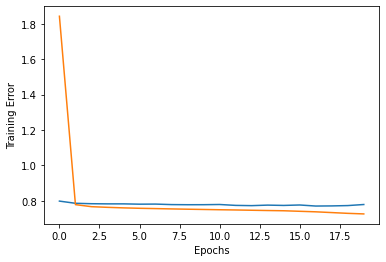

In [ ]:
from sklearn.model_selection import train_test_split

users = np.array(train_vec.user_id).astype('int32')
business = np.array(train_vec.business_id).astype('int32')
ratings = np.array(train_vec.ratings).astype('int32')

y_train, y_test, user_train, user_test, bus_train, bus_test = train_test_split(ratings, users, business,test_size=0.2, random_state = 42)

history = model2.fit([user_train, bus_train], y_train, epochs=20 , batch_size=10000, verbose = 1,  validation_data=([user_test, bus_test], y_test))
#history = model2.fit([user_train, bus_train], y_train, epochs=7, verbose=1 , batch_size=1000, workers=0)
#history = model2.fit([users, business], ratings, epochs=5 , batch_size=100, verbose = 1,  validation_split = 0.2)
#model2.save('regression_model2.h5')

plt.plot(history.history['val_mae'])
plt.plot(history.history['mae'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [ ]:
model2.save("FC_RN_AS.h5")

In [ ]:
from tensorflow import keras
mdl = keras.models.load_model('FC_RN_AS.h5')

In [ ]:
ratings = model2([user_test, bus_test]).numpy()

out = open('fc_rn_res.txt', 'w')

for user, bus, rating in zip(user_test, bus_test, ratings):

  line = " ".join([inv_idu[user], inv_idb[bus] , str(rating[0])  ])
  out.write(line + "\n")

out.close()


In [ ]:
inv_idu[user_test[0]]


'MuLPdU0GYhdGWV71PTJW-Q'

#Run algorithme

In [ ]:
print(len(idb))
print(len(train_vec.ratings))

32620
908618
